## MSDS 7331: Data Mining
## Lab 2:  Classification & Regression - Group 4

#### Paticia Attah
#### Linda Eliasen


NEEDS TO BE UPDATED

Using logistic regression and SVM we will predict the case status (certified / non certified) of an application submitted by the employer to hire non-immigrant workers under the H-1B visa program. Employers can hire non-immigrant workers only after their LCA petition is certified. The certified LCA petition is then submitted as part of the Petition for a Non-immigrant Worker application for work authorizations for H-1B visa status.<br>

The goal is to uncover insights that can help employers understand the process of getting their LCA approved. The results will help employers understand which applications that they may consider submitting will be certified. This information is important to an employer's buisness operations. It can pinpoint errors or informtion on the appication that may need adjusting to avoid processing delays and also drive the recruiting strategy in denial situations.<br>

Classification measures of success include accuracy, precision, recall and utltimatley the F Score, which we will compare among models.
The H-1B Dataset contains data from employers Labor Condition Applications and the case certification determinations processed by the Office of Foreign Labor Certification (OFLC) where the date of the determination was issued on or after October 1, 2016 and on or before June 30, 2017.

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics as mt
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from IPython.html import widgets 

from time import time

import pandas as pd
import statsmodels.api as sm 
import numpy as np
import random

import math

import warnings
warnings.filterwarnings("ignore")

C:\Users\linda\anaconda3\envs\ML_7331\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Data Preparation Part 1

Define and prepare your class variables. 

xxxx

# Data Preparation Part 2

Describe the final dataset that is used 

# Modeling and Evaluation 1

Choose and explain your evaluation metrics that you will use

### Classification

### Regression

MAE, MAPE and RMSE will be used to evaluate the prediction error rates and model performance of the regression models.

MAE (Mean Absolute Error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

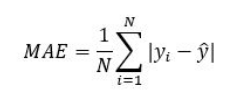

MAPE (Mean Absolute Percentage Error) measures this accuracy as a percentage, and can be calculated as the average absolute percent error for each time period minus actual values divided by actual values.

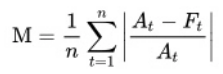

RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.

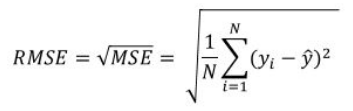

https://www.datatechnotes.com/2019/02/regression-model-accuracy-mae-mse-rmse.html#:~:text=MAE%20(Mean%20absolute%20error)%20represents,difference%20over%20the%20data%20set.

https://www.statisticshowto.com/mean-absolute-percentage-error-mape/#:~:text=It%20measures%20this%20accuracy%20as,values%20divided%20by%20actual%20values.


# Modeling and Evaluation 2

Choose the method you will use for dividing your data into training and
testing splits 

### Classification

### Regression

The method used for the regression models is ten-fold cross validation with repeated holdout using ShuffleSplit. 80% of the data set used for training and 20% reserved for testing. To ensure the same splits for each cxross validation, a random seed was set. 

Using CV eliminates the need for a validation set (which drastically reduces the number of samples which can ge used for learning the model and the results can depend on a particular random choce for the pair of train & validation sets.  While this approach can be computationally expensive, it does not waste too much of the data. 

https://scikit-learn.org/stable/modules/cross_validation.html

# Modeling and Evaluation 3

Create three different classification/regression models for each task 

### Classification

### Regression

https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

In [2]:
df8 = pd.read_csv ('Clean_Visa_Regression.csv')

In [3]:
df8.shape

(33476, 34)

In [4]:
df8.head()

,DAYS_PROCESS,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,ANNUALIZED_PREVAILING_WAGE,ANNUALIZED_WAGE_RATE_OF_PAY,WILL_VIOL_Y,"Arts, Design, Entertainment, Sports, and Media",...,Office and Administrative Support,Personal Care and Service,Production,Protective Services,Sales and Related,Transportation and Material Moving,AGENT_REP_Y,H1B_DEP_Y,LABOR_CON_AGREE_Y,SUPPORT_H1B_Y
0,4,1,1,0,0,0,80184.0,90500.0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,6,1,1,0,0,0,55910.0,65000.0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,6,1,1,0,0,0,88067.0,120000.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7,1,1,0,0,0,96138.0,157800.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3,1,1,0,0,0,71053.0,75000.0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [43]:
df8.describe()

,DAYS_PROCESS,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,ANNUALIZED_PREVAILING_WAGE,ANNUALIZED_WAGE_RATE_OF_PAY,WILL_VIOL_Y,"Arts, Design, Entertainment, Sports, and Media",...,Office and Administrative Support,Personal Care and Service,Production,Protective Services,Sales and Related,Transportation and Material Moving,AGENT_REP_Y,H1B_DEP_Y,LABOR_CON_AGREE_Y,SUPPORT_H1B_Y
count,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000,...,33476.000000,33476.000000,33476.000000,33476.0,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000,33476.000000
mean,5.354732,2.104702,0.879287,0.352312,0.162086,0.008902,74337.889482,87036.307099,0.000986,0.015982,...,0.001613,0.000836,0.000866,0.0,0.005257,0.000119,0.553411,0.368742,0.410115,0.367308
std,1.410031,5.474241,3.772837,1.561015,1.458702,0.304869,22663.008387,29422.875499,0.031382,0.125406,...,0.040132,0.028909,0.029421,0.0,0.072319,0.010931,0.497146,0.482471,0.491862,0.482079
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12000.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,58552.000000,65000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,70741.000000,80000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,87818.000000,104000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,155.000000,150.000000,55.000000,50.000000,50.000000,148366.000000,181000.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# divide data set to x explanatory and y response variable
X = df8.drop(columns=['DAYS_PROCESS'])
y = df8['DAYS_PROCESS']

In [6]:
#CROSS VALIDATION 
#Divide data into test and training splits
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=24)

In [7]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#Function for Root mean squared error
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               }

In [8]:
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults

#### Base Linear Regression Model

In [48]:
from sklearn.linear_model import LinearRegression
#Create a Linear Regression object and perform a grid search to find the best parameters
linreg = LinearRegression()
parameters = {'normalize':(True,False), 'fit_intercept':(True,False)}

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.3s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=24, test_size=0.2, train_size=None),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': (True, False),
                         'normalize': (True, False)},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [49]:
#Print the parameterization of the best estimator
regGridSearch.best_estimator_

LinearRegression(normalize=True)

In [50]:
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, X, y, cv)

The average MAE for all cv folds is: 			 1.0825
The average MAE percentage (MAPE) for all cv folds is: 	 34.218
The average RMSE for all cv folds is: 			 1.3841
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,1.072541,33.195344,1.365185
1,1.083953,34.285799,1.393356
2,1.084819,34.725484,1.392240
3,1.091535,34.614100,1.394734
4,1.087202,34.588019,1.388986
5,1.095265,34.388973,1.394026
6,1.083288,34.269814,1.388296
7,1.081774,34.777594,1.387966
8,1.078162,33.479643,1.371015
9,1.066455,33.850508,1.364709


#### LASSO

In [51]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Lasso

reg = Lasso(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=10000, precompute=True, tol=0.0001, random_state=0)

#Test parameters 
alpha = [0.001, 0.1, 1, 10, 20]
selection = ['cyclic','random']
warm_start = [True, False]
parameters = {'alpha': alpha, 'selection': selection, 'warm_start': warm_start}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   12.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   12.2s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=24, test_size=0.2, train_size=None),
             estimator=Lasso(max_iter=10000, normalize=True, precompute=True,
                             random_state=0),
             n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 10, 20],
                         'selection': ['cyclic', 'random'],
                         'warm_start': [True, False]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [52]:
#Display the best estimator parameters
regGridSearch.best_estimator_

Lasso(alpha=0.001, max_iter=10000, normalize=True, precompute=True,
      random_state=0, warm_start=True)

In [53]:
from sklearn.linear_model import Lasso

#Create a regression estimator with best parameters for cross validation
regEstimator = Lasso(alpha=0.001, max_iter=10000,
                     normalize=True, precompute=True, random_state=0,
                     warm_start=True)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X, y, cv)

The average MAE for all cv folds is: 			 1.1199
The average MAE percentage (MAPE) for all cv folds is: 	 35.571
The average RMSE for all cv folds is: 			 1.4096
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,1.105913,34.539242,1.387591
1,1.119208,35.520407,1.413249
2,1.123648,36.068623,1.418708
3,1.129187,36.065921,1.421918
4,1.125014,35.948128,1.415678
5,1.133515,35.823229,1.423191
6,1.120032,35.507170,1.410103
7,1.122911,36.209496,1.416956
8,1.114126,34.747661,1.394299
9,1.105386,35.278509,1.394738


#### RIDGE REGRESSION

In [54]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Ridge

reg = Ridge(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=1000, tol=0.0001, random_state=0)

#Test parameters 
alpha = [0.001, 0.1, 1, 5, 10, 20]
solver = [ 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
parameters = {'alpha': alpha, 'solver': solver}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   14.8s
[Parallel(n_jobs=8)]: Done 360 out of 360 | elapsed:   21.0s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=24, test_size=0.2, train_size=None),
             estimator=Ridge(max_iter=1000, normalize=True, random_state=0,
                             tol=0.0001),
             n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 5, 10, 20],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [55]:
#Display the best estimator parameters
regGridSearch.best_estimator_

Ridge(alpha=0.001, max_iter=1000, normalize=True, random_state=0,
      solver='sparse_cg', tol=0.0001)

In [56]:
#Create a regression estimator with best parameters for cross validation
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X, y, cv)

The average MAE for all cv folds is: 			 1.0825
The average MAE percentage (MAPE) for all cv folds is: 	 34.219
The average RMSE for all cv folds is: 			 1.384
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,1.072579,33.197166,1.365189
1,1.083985,34.287128,1.393329
2,1.084857,34.726817,1.392227
3,1.091574,34.616125,1.394720
4,1.087232,34.589416,1.388966
5,1.095315,34.391178,1.394045
6,1.083325,34.271103,1.388276
7,1.081826,34.779511,1.387981
8,1.078197,33.481190,1.371000
9,1.066500,33.852324,1.364711


#### ELASTICNET

In [58]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import ElasticNet

reg = ElasticNet(fit_intercept=True, normalize=True, precompute=True, copy_X=True
          , max_iter=10000, tol=0.0001, random_state=0)
 
#Test parameters
l1_ratio = [0.001, 0.01, 0.1, 0.5, 0.75, 1]
alpha = [0.001, 0.1, 1, 10]
selection = ['cyclic','random']
warm_start = [True, False]
parameters = {'l1_ratio': l1_ratio, 'alpha': alpha, 'selection': selection, 'warm_start': warm_start}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    6.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   11.5s
[Parallel(n_jobs=8)]: Done 960 out of 960 | elapsed:   14.1s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=24, test_size=0.2, train_size=None),
             estimator=ElasticNet(max_iter=10000, normalize=True,
                                  precompute=True, random_state=0),
             n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 10],
                         'l1_ratio': [0.001, 0.01, 0.1, 0.5, 0.75, 1],
                         'selection': ['cyclic', 'random'],
                         'warm_start': [True, False]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [59]:
#Display the best estimator parameters
regGridSearch.best_estimator_

ElasticNet(alpha=0.001, l1_ratio=0.001, max_iter=10000, normalize=True,
           precompute=True, random_state=0, selection='random',
           warm_start=True)

In [60]:
#Create a regression estimator with best parameters for cross validation
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X, y, cv)

The average MAE for all cv folds is: 			 1.1178
The average MAE percentage (MAPE) for all cv folds is: 	 35.5
The average RMSE for all cv folds is: 			 1.4071
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,1.104244,34.473069,1.385321
1,1.117217,35.453298,1.410939
2,1.121405,35.995262,1.416086
3,1.126962,35.988889,1.419200
4,1.122841,35.874466,1.412949
5,1.131410,35.750050,1.420552
6,1.117935,35.442451,1.407687
7,1.120634,36.134022,1.414372
8,1.112114,34.681523,1.391842
9,1.103218,35.204657,1.392095


#### MULTI LAYER PERCEPTRON

In [62]:
#Create a Linear Regression object and perform a grid search to find the best parameters
from sklearn.neural_network import MLPRegressor

linreg = MLPRegressor()
parameters = { 'activation':['logistic']
              ,'hidden_layer_sizes' : [200]
              ,'solver': ['sgd','adam']
              ,'alpha': [0.001]
              ,'batch_size':['auto'] 
              ,'random_state': [0]
              ,'learning_rate': ['constant', 'invscaling', 'adaptive']
              ,'learning_rate_init':[0.001]
              ,'power_t':[0.5]
              ,'max_iter':[1000]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:  3.6min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=24, test_size=0.2, train_size=None),
             estimator=MLPRegressor(), n_jobs=8,
             param_grid={'activation': ['logistic'], 'alpha': [0.001],
                         'batch_size': ['auto'], 'hidden_layer_sizes': [200],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.001], 'max_iter': [1000],
                         'power_t': [0.5], 'random_state': [0],
                         'solver': ['sgd', 'adam']},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [63]:
#Display the best estimator parameters
regGridSearch.best_estimator_

MLPRegressor(activation='logistic', alpha=0.001, hidden_layer_sizes=200,
             max_iter=1000, random_state=0)

In [64]:
#CreateLinearRegression predictions using the best parameters for our Linear Regression object
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, X, y, cv)

The average MAE for all cv folds is: 			 1.1183
The average MAE percentage (MAPE) for all cv folds is: 	 35.498
The average RMSE for all cv folds is: 			 1.4099
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,1.111330,34.481628,1.386074
1,1.104293,35.466180,1.412394
2,1.116034,35.988610,1.416504
3,1.135251,35.997925,1.420207
4,1.106243,35.831696,1.413276
5,1.184409,35.807731,1.429608
6,1.098203,35.431993,1.409449
7,1.070600,36.100625,1.421154
8,1.141597,34.665421,1.397084
9,1.114770,35.210481,1.392795


#### RANDOM FOREST

##### DO NOT RUN - - Processing time is lengthy

Screen shots inserted as back-up to show results

In [9]:
#RANDOM FOREST
#Create a Linear Regression object and perform a grid search to find the best parameters
from sklearn.ensemble import RandomForestRegressor

#linreg = RandomForestRegressor()
parameters = {'max_depth' :[20]
              ,'n_estimators' : [60]
              ,'min_samples_leaf': [10, 25, 50]
              ,'criterion': ['mae']
              ,'n_jobs':[8] 
              ,'random_state': [0]
             }

#Create a grid search object using the  
#from sklearn.model_selection import GridSearchCV
#RFregGridSearch = GridSearchCV(estimator=linreg
                   , n_jobs=8 
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
#RFregGridSearch.fit(X, y)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed: 354.0min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=24, test_size=0.2, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=8,
             param_grid={'criterion': ['mae'], 'max_depth': [20],
                         'min_samples_leaf': [10, 25, 50], 'n_estimators': [60],
                         'n_jobs': [8], 'random_state': [0]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

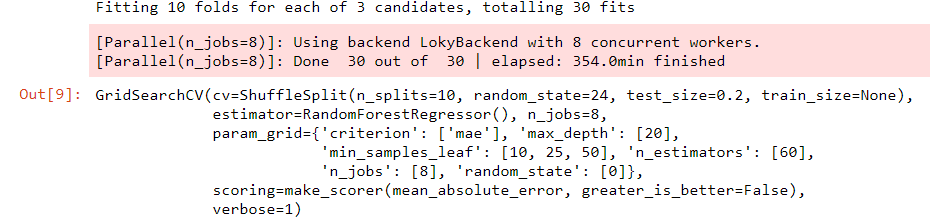

In [10]:
#RANDOM FOREST
#Display the best estimator parameters
#RFregGridSearch.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=20, min_samples_leaf=10,
                      n_estimators=60, n_jobs=8, random_state=0)

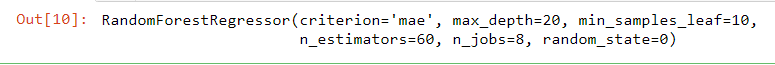

In [11]:
#RANDOM FOREST
#Create a regression estimator with best parameters for cross validation
#RFregEstimator = RFregGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
#EvaluateRegressionEstimator(RFregEstimator, X, y, cv)

The average MAE for all cv folds is: 			 0.87744
The average MAE percentage (MAPE) for all cv folds is: 	 34.235
The average RMSE for all cv folds is: 			 1.4983
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,0.857481,32.976925,1.473301
1,0.877220,34.225094,1.505531
2,0.884305,34.994889,1.518061
3,0.895364,34.658143,1.504157
4,0.877282,34.503588,1.496983
5,0.894326,34.358656,1.505133
6,0.877673,34.288787,1.502418
7,0.874688,34.929679,1.506308
8,0.867005,33.280284,1.476841
9,0.869064,34.133907,1.494420


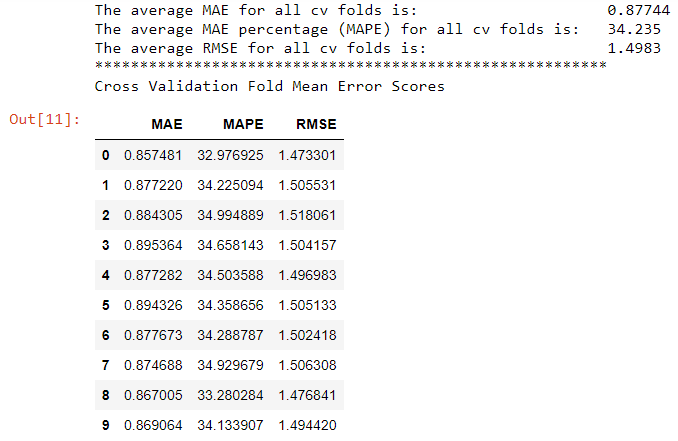

## Modeling and Evaluation 4

Analyze the results using your chosen method of evaluation

### Classification

### Regression

The base linear regression model resulted in an MAE of 1.0825 (34.218%) and an RSME of 1.3841.

Across all cross-validations, LASSO, Elasticnet and Mutli-Layer Perceptron performed slightly worse, while Ridge performed the same

Random Forest, even though a more modest model was run due to computational time, performed much better on MAE (0.87744), nearly the same for MAE Percentage (34.235) and 1.498 for RMSE.

MAE is the average over the verification sample of the absolute values of the differences between forecast and the corresponding observation. The MAE is a linear score which means that all the individual differences are weighted equally in the average.  

The RMSE is a quadratic scoring rule which measures the average magnitude of the error and gives a relatively high weight to large errors. This means the RMSE is most useful when large errors are particularly undesirable. In the case of this analysis, the time span of DAYS_PROCESS is 0 -10 days, so we do not feel this is a concern.

With the baseline mode, the difference between MAE and RSME is 0.3016 and 0.6236 with Random Forest, indicating that Random Forest had greater variance in the individual errors in the sample.

Because MAE focuses on accuracy and Random Forest modeling performed better, it was selected as the better model.

http://www.eumetrain.org/data/4/451/english/msg/ver_cont_var/uos3/uos3_ko1.htm

## Modeling and Evaluation 5

Discuss the advantages of each model for each classification / regression task

### Classification

### Regression

TBC

## Modeling and Evaluation 6

Which attributes from your analysis are most important? 

### Classification

### Regression

Top Performing Model Analysis
DO NOT RUN - Processing time

Screen shots included as back up

In [12]:

#Fit the model 
#RFregEstimator.fit(X, y)

RandomForestRegressor(criterion='mae', max_depth=20, min_samples_leaf=10,
                      n_estimators=60, n_jobs=8, random_state=0)

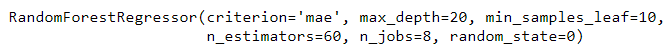

In [14]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
#weights = RFregEstimator.feature_importances_.ravel()
feature_names = X.columns.values
#linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
linreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

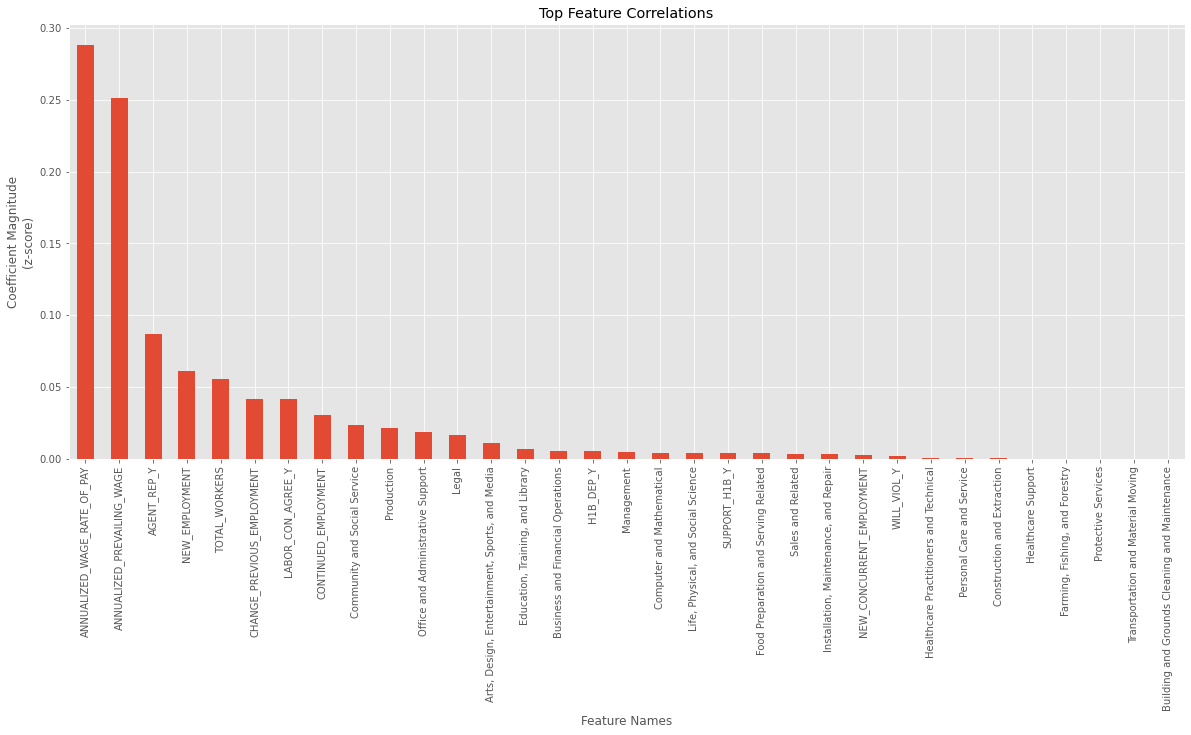

In [15]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

#wt_plt_df = linreg_ft_imp_df.head(75)

#weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

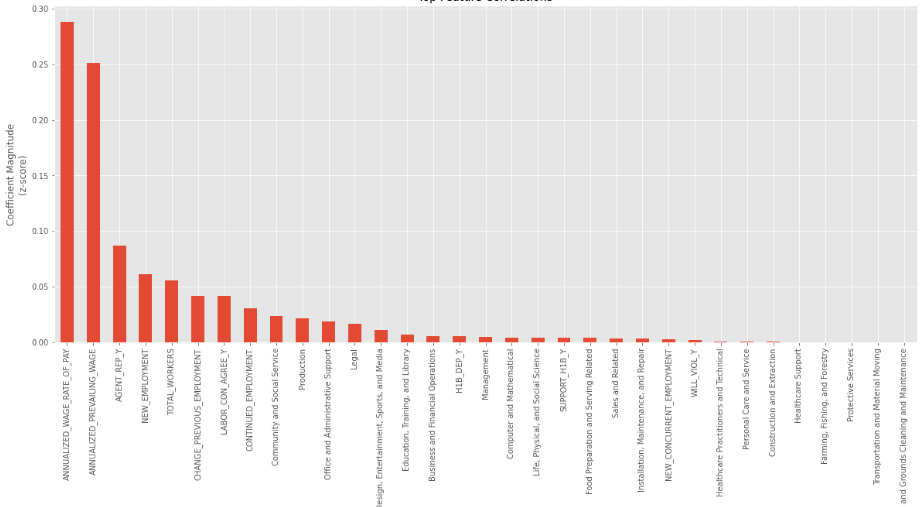

### Top 15 Feature Importance

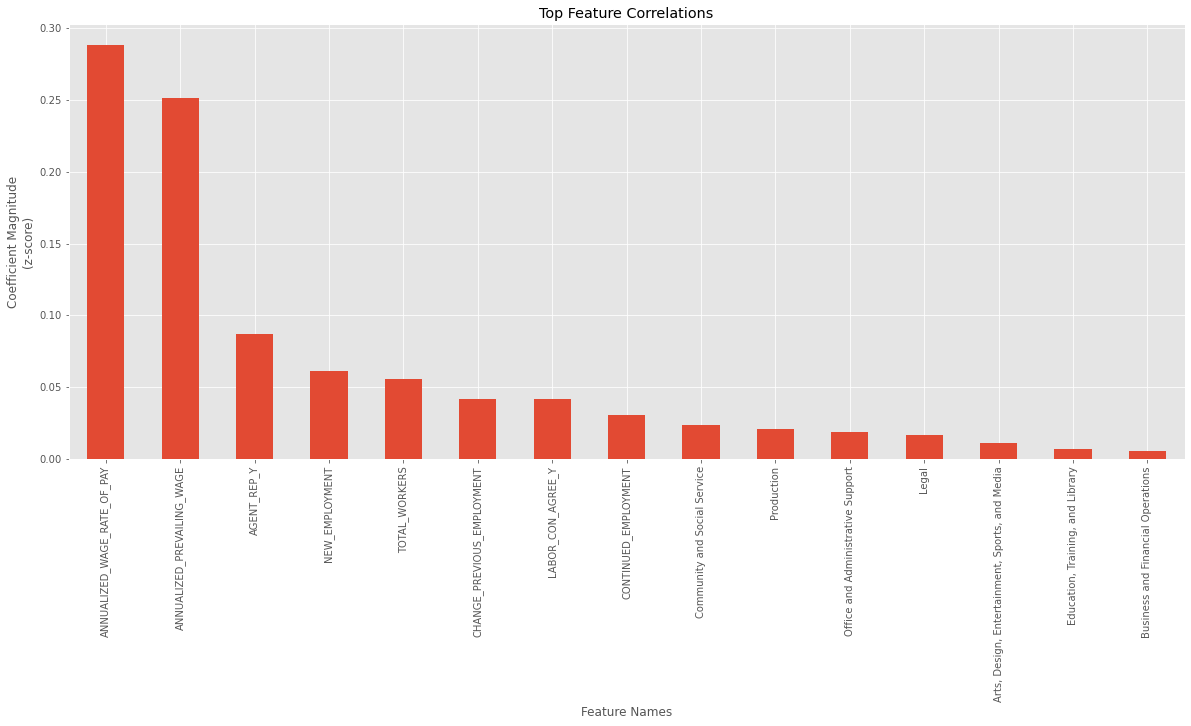

In [20]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

#wt_plt_df = linreg_ft_imp_df.head(15)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

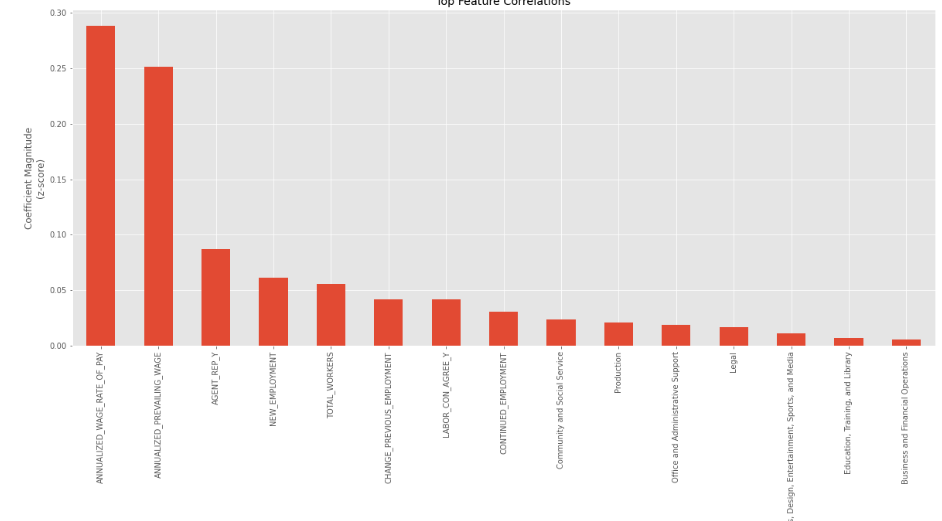

Feature discussion xxxx

## Deployment

How useful is your model for interested parties 

### Classification

### Regression

XXXX

## Exceptional Work